<a href="https://colab.research.google.com/github/gbnegrini/monitoria-processamento-imagens/blob/main/INF0018_2_Manipulacao_Basica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Introdução ao Processamento Digital de Imagens (INF0018) </center>
## <center> Curso de Informática Biomédica - UFCSPA </center>

## Material de apoio
### Monitor: Guilherme Bauer Negrini (guilhermebn@ufcspa.edu.br)

\
As imagens utilizadas estão disponíveis como recursos educacionais na página: http://www.imageprocessingplace.com/DIP-3E/dip3e_book_images_downloads.htm
______________________________

# Bibliotecas e pacotes

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Carregando uma imagem

Para carregar e manipular uma imagem, primeiro é preciso fazer o upload um arquivo de imagem no ambiente virtual do Google Colab: 
 

1.   Clique no ícone da pastinha no menu lateral esquerdo.
2.   Utilize o ícone de upload ou arraste o arquivo desejado para a área do menu lateral.

Após o upload, o arquivo estará disponível no diretório base do ambiente.


_____________
### ***FAÇA VOCÊ***

Baixe [essa imagem](https://drive.google.com/file/d/1okPnAmL_DyVU8OhdGhr4hS6PifiMQDGR/view?usp=sharing) e faça o upload no ambiente.
_____

A função ***imread()*** do openCV é utilizada para carregar uma imagem de um arquivo. Basta passar como argumentos o caminho do arquivo e o modo de abertura (escala de cinza ou colorido).

In [ ]:
img_dolar = cv2.imread("Fig0115(b)(100-dollars).tif", cv2.IMREAD_GRAYSCALE)

# Propriedades da imagem

In [ ]:
img_dolar

array([[194, 194, 194, ..., 194, 194, 194],
       [194, 194, 194, ..., 194, 194, 194],
       [194, 194, 194, ..., 194, 194, 194],
       ...,
       [194, 194, 194, ..., 194, 194, 194],
       [194, 194, 194, ..., 194, 194, 194],
       [194, 194, 194, ..., 194, 194, 194]], dtype=uint8)

Observe acima que a imagem carregada nada mais é do que um array bidimensional. Cada pixel é caracterizado por uma coordenada (x,y) e um valor de intensidade. O tamanho dessa matriz/imagem é determinada pelo número de colunas/largura (m) e linhas/altura (n) da matriz (m x n).

In [ ]:
img_dolar.shape

(500, 1192)

A imagem possui 500 px de altura e 1192 px de largura

In [ ]:
img_dolar.max()

247

O valor máximo de intensidade da imagem é 247.

_____________
### ***FAÇA VOCÊ***

Descubra o valor mínimo e médio da intensidade dos pixels da imagem.

In [ ]:
# SEU CÓDIGO AQUI

Resultado:

Mínimo: 0
Médio: 152.58884228187918


__________

# Visualizando uma imagem

Para visualizar a representação da imagem de fato, e não a matriz, precisamos utilizar a função ***plt.imshow()***.

\
Passamos como argumentos a imagem carregada, o mapa de cores utilizado e os valores mínimos e máximos que os pixels podem assumir.

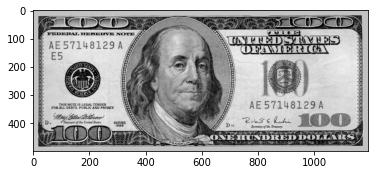

In [ ]:
plt.imshow(img_dolar, cmap='gray', vmin=0, vmax=255)

Perceba a necessidade de informar os valores dos parâmetros ***vmin*** e ***vmax***. Os valores mínimos e máximos esperados para uma imagem de 8 bits em escala de cinza são 0 e 255, respectivamente. 

**Cuidado**: se *vmin* e *vmax* não forem definidos, o *matplotlib* irá definir com base nos valores existentes na imagem e isso pode acabar ajustanto o contraste automaticamente.

O uso de ***subplots*** pode ajudar mais tarde quando precisaremos fazer comparações entre imagens após algumas operações. Consulte a [documentação](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplot.html) para melhor compreensão dos arranjos possíveis.

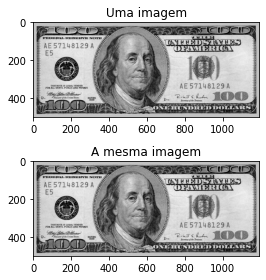

In [ ]:
plt.subplot(2,1,1) # 2 linhas, 1 coluna, posição 1
plt.title('Uma imagem')
plt.imshow(img_dolar, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,1,2) # 2 linhas, 1 coluna, posição 2
plt.title('A mesma imagem')
plt.imshow(img_dolar, cmap='gray', vmin=0, vmax=255)

plt.tight_layout() # evita a sobreposição dos eixos das imagens

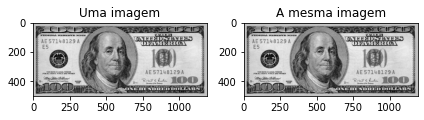

In [ ]:
plt.subplot(1,2,1) # 1 linha, 2 colunas, posição 1
plt.title('Uma imagem')
plt.imshow(img_dolar, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2) # 1 linha, 2 colunas, posição 2
plt.title('A mesma imagem')
plt.imshow(img_dolar, cmap='gray', vmin=0, vmax=255)

plt.tight_layout() # evita a sobreposição dos eixos das imagens

# Operações básicas com imagens

## Corte seletivo

\
Como vimos anteriormente, as imagens são representadas por arrays bidimensionais. Nesse caso, podemos utilizar as propriedades de *slicing* de arrays em Python!

\
Fazer um *slice* significa selecionar os elementos de um índice até outro do array: ***meu_array[inicio:fim]***.

\
Como estamos lidando com arrays bidimensionais, as posições de inicio e fim devem ser definidas tanto para as linhas quanto para as colunas: ***meu_array[inicio:fim, inicio:fim]***

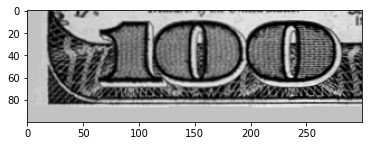

In [ ]:
corte = img_dolar[400:500, 0:300]
plt.imshow(corte, cmap='gray', vmin=0, vmax=255)

_____________
### ***FAÇA VOCÊ***
Realize o *slicing* da região que contém o texto "ONE HUNDRED DOLLARS" no canto inferior direito da imagem.

\
**Dica**: esse é um processo apenas aproximado e manual. Observe os eixos x e y da imagem original plotada e tente encontrar os valores aproximados das coordenadas para a região.

In [ ]:
#SEU CÓDIGO AQUI

O resultado final deve ser parecido com a imagem abaixo:

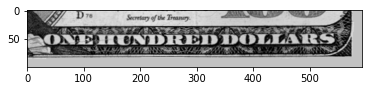

_____

## Espelhamento

Para espelhar imagens também podemos aproveitar as propriedades de um array ao utilizar um passo negativo (-1) para inverter a direção desejada:

***meu_array[inicio:fim, inicio:fim:-1]***, irá espelhar a imagem **horizontalmente**



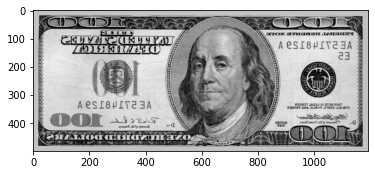

In [ ]:
img_dolar_flip_horizontal = img_dolar_flip_horizontal[::,::-1]
plt.imshow(img_dolar_flip_horizontal, cmap='gray', vmin=0, vmax=255)

Outro modo é com a utilização da função ***flip()*** do openCV:

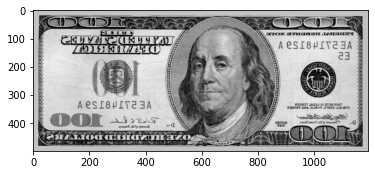

In [ ]:
img_dolar_flip_horizontal = cv2.flip(img_dolar, flipCode=1)
plt.imshow(img_dolar_flip_horizontal, cmap='gray', vmin=0, vmax=255)

_________
### ***FAÇA VOCÊ***

Realize o espelhamento **vertical** da imagem.

In [ ]:
# SEU CÓDIGO AQUI

Resultado:

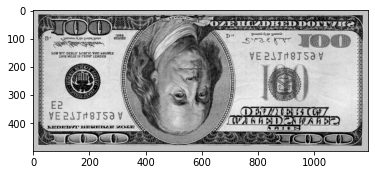

_________

## Rotação

O pacote openCV oferece a função ***rotate()*** para rotacionar as imagens.

\
Veja abaixo como rotacionar em **90º no sentido horário**:

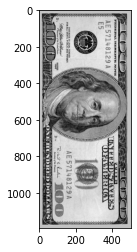

In [ ]:
img_dolar_90_cw = cv2.rotate(img_dolar, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(img_dolar_90_cw, cmap='gray', vmin=0, vmax=255)

_________
### ***FAÇA VOCÊ***

Realize as rotações de  **90º no sentido anti-horário** e **180º** da imagem.

In [ ]:
# SEU CÓDIGO AQUI

Resultado

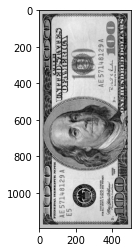

In [ ]:
plt.imshow(cv2.rotate(img_dolar, cv2.ROTATE_90_COUNTERCLOCKWISE), cmap='gray', vmin=0, vmax=255)

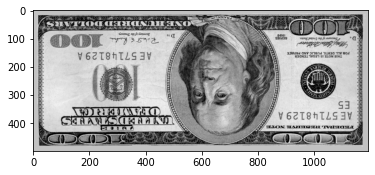

In [ ]:
plt.imshow(cv2.rotate(img_dolar, cv2.ROTATE_180), cmap='gray', vmin=0, vmax=255)

______